## Ćwiczenie 3 - Analiza sygnału EKG w dziedzinie częstotliwości

### 1) Wczytujemy sygnał ecg100.txt i przedstawiamy go wizualnie na wykresie. Częstotliwość próbkowania fs wynosi 360 Hz, a liczba wczytanych próbek to 649999.


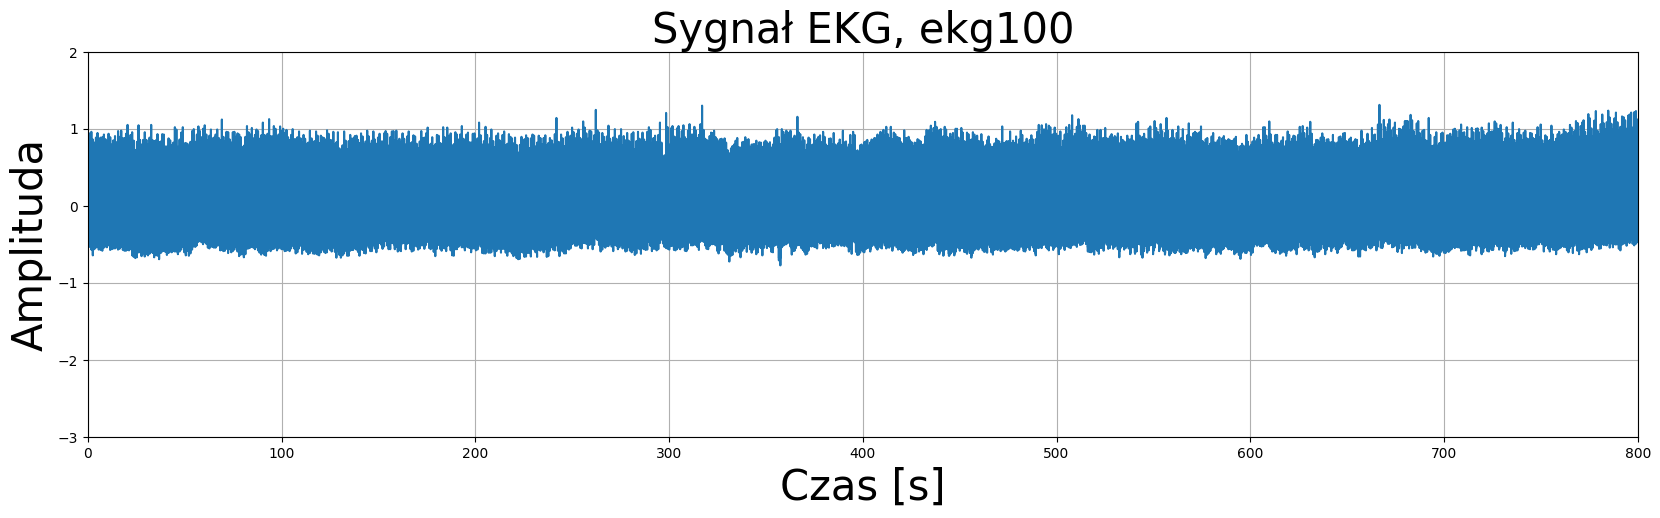

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def load_signal(file_path, num_rows=None):

    if num_rows is not None:
        signal = np.loadtxt(file_path, max_rows=num_rows)
    else:
        signal = np.loadtxt(file_path)
    return signal


def visualize_signal(signal, fs):
    time = np.arange(len(signal)) / fs
    plt.figure(figsize=(20, 5))
    plt.plot(time, signal)
    # plt.plot(time, signal, color='PINK', label='Sygnał EKG')
    plt.title('Sygnał EKG, ekg100',fontsize =30)
    plt.xlabel('Czas [s]', fontsize =30)
    plt.ylabel('Amplituda', fontsize =30)
    plt.grid(True)
    plt.xlim(0,800)
    plt.ylim(-3,2.0)
    # plt.legend()
    # plt.savefig('ekg100.png')  # Zapisz wykres do pliku obrazu

    plt.show()



file_path = "ekg100.txt"
fs = 360  # Częstotliwość próbkowania
num_rows = 649999  # liczba wierszy do wczytania
signal = load_signal(file_path, num_rows)
if signal is not None:
    visualize_signal(signal, fs)

### 2) Wyznaczenie dyskretnej transformaty Fouriera i widma amplitudowego
Kod powyżej oblicza dyskretną transformatę Fouriera (DFT) sygnału EKG oraz wyznacza widmo amplitudowe. Następnie widmo to jest wizualizowane na wykresie w funkcji częstotliwości w zakresie [0, fs/2].


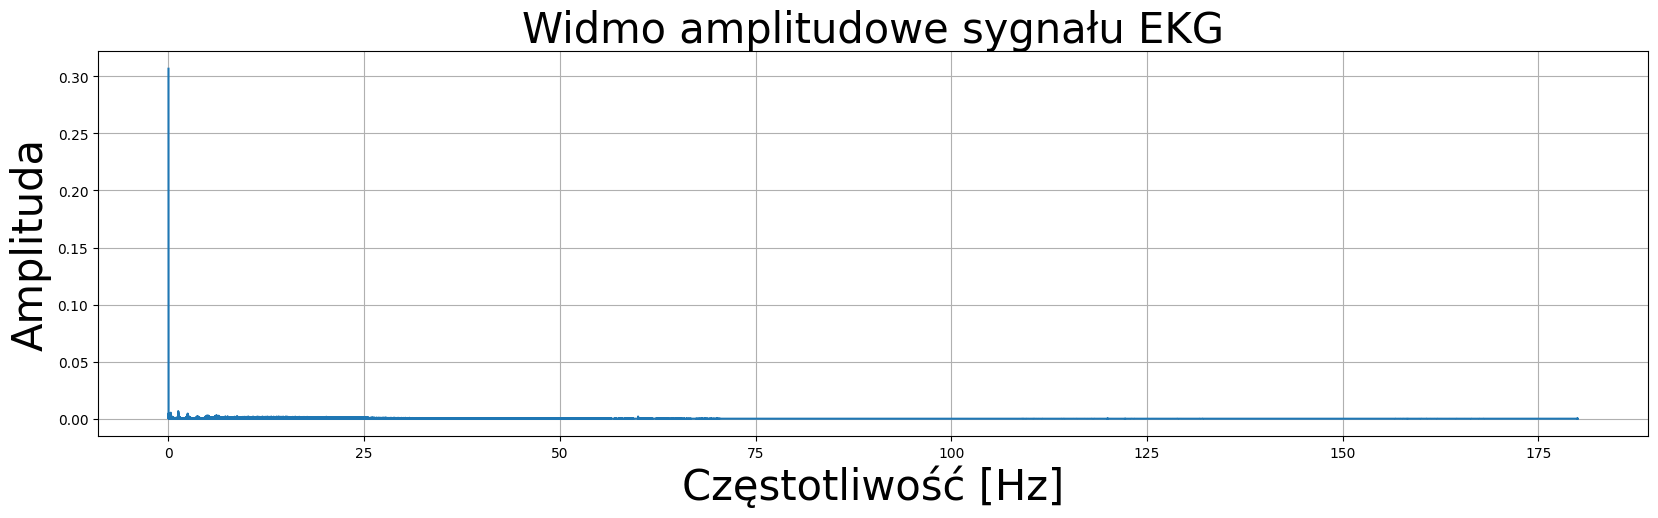

In [2]:
def compute_fft(signal, fs):
    n = len(signal)
    fft_signal = np.fft.fft(signal)
    amplitude_spectrum = np.abs(fft_signal) / n
    frequency = np.fft.fftfreq(n, 1 / fs)
    return frequency, amplitude_spectrum

def visualize_fft(frequency, amplitude_spectrum, fs):
    plt.figure(figsize=(20, 5))
    plt.plot(frequency[:len(frequency)//2], amplitude_spectrum[:len(amplitude_spectrum)//2])
    plt.title('Widmo amplitudowe sygnału EKG', fontsize=30)
    plt.xlabel('Częstotliwość [Hz]', fontsize=30)
    plt.ylabel('Amplituda', fontsize=30)
    plt.grid(True)
    plt.show()

frequency, amplitude_spectrum = compute_fft(signal, fs)
visualize_fft(frequency, amplitude_spectrum, fs)

### 3) Wyznaczenie odwrotnej dyskretnej transformaty Fouriera i porównanie z oryginalnym sygnałem
Kod powyżej oblicza odwrotną dyskretną transformatę Fouriera (IDFT) wyznaczonego wcześniej sygnału FFT i porównuje otrzymany ciąg próbek z pierwotnym sygnałem EKG.

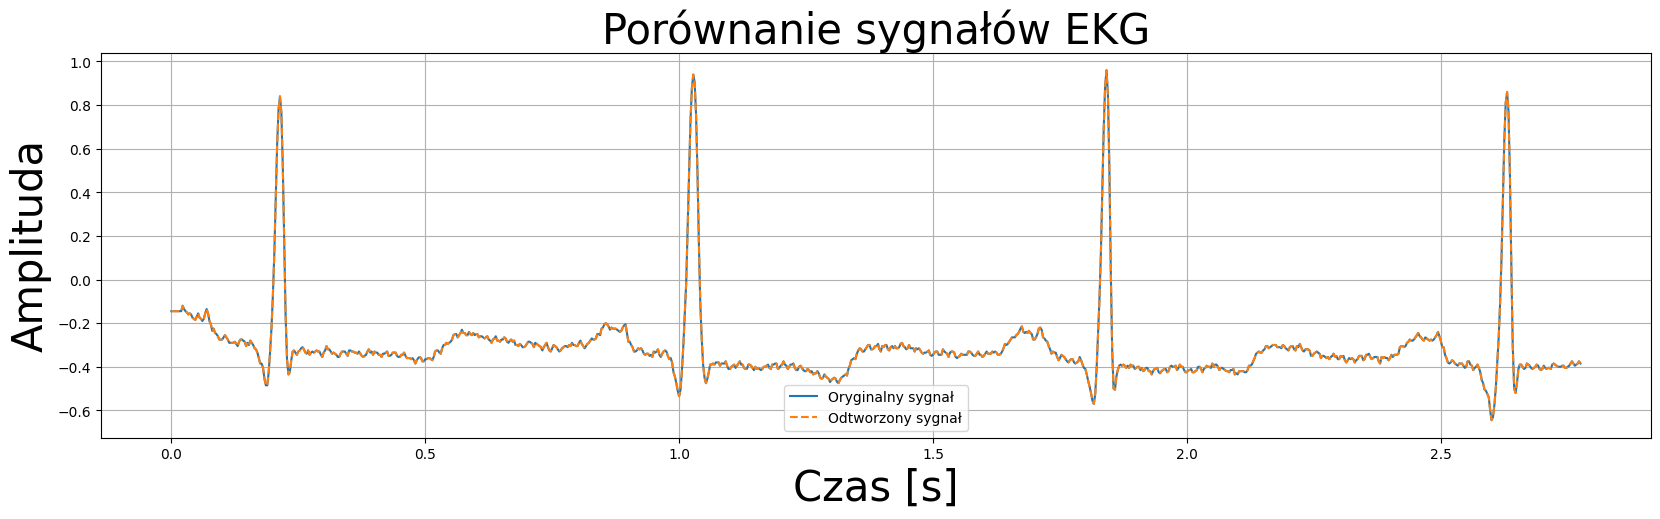

In [3]:
def compute_ifft(fft_signal):
    ifft_signal = np.fft.ifft(fft_signal)
    return ifft_signal

def compare_signals(original_signal, reconstructed_signal, fs):
    time = np.arange(len(original_signal)) / fs
    plt.figure(figsize=(20, 5))
    plt.plot(time[:1000], original_signal[:1000], label='Oryginalny sygnał')
    plt.plot(time[:1000], reconstructed_signal[:1000].real, label='Odtworzony sygnał', linestyle='--')
    plt.title('Porównanie sygnałów EKG', fontsize=30)
    plt.xlabel('Czas [s]', fontsize=30)
    plt.ylabel('Amplituda', fontsize=30)
    plt.legend()
    plt.grid(True)
    plt.show()

reconstructed_signal = compute_ifft(np.fft.fft(signal))
compare_signals(signal, reconstructed_signal, fs)